### Install Pymatgen: 

Pymatgen (Python Materials Genomics) is a robust, open-source Python library for materials analysis.

- Official Documentation: https://pymatgen.org/

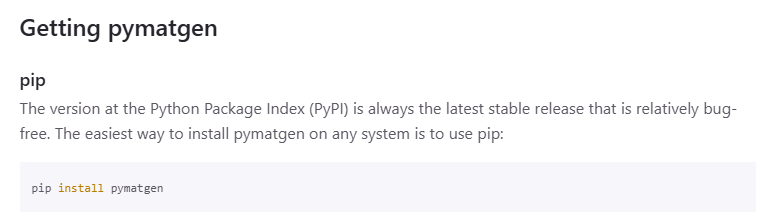

In [1]:
pip install pymatgen

     ---------------------------------------- 7.3/7.3 MB 14.2 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 29.4 MB/s eta 0:00:00
     ---------------------------------------- 63.4/63.4 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 299.3/299.3 kB 9.3 MB/s eta 0:00:00
     ---------------------------------------- 60.1/60.1 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 97.3/97.3 kB ? eta 0:00:00
     ---------------------------------------- 332.3/332.3 kB ? eta 0:00:00
     ------------------------------------- 561.4/561.4 kB 36.7 MB/s eta 0:00:00
     ---------------------------------------- 170.7/170.7 kB ? eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.6
    Uninstalling pydantic-2.10.6:
      Successfully uninstalled pydantic-2.10.6
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Importing Libraries. 

import pandas as pd
import numpy as np
import pymatgen
import matplotlib.pyplot as plt

from pymatgen.core import Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.analysis.diffraction.neutron import NDCalculator
from pymatgen.analysis.diffraction.tem import TEMCalculator
from pymatgen.analysis.diffraction.tem import TEMCalculator
import plotly.graph_objects as go

Here you can choose the structure you want to analyze.

My information is from [1]: https://aflowlib.org/p/AB_hP4_194_c_d-001/

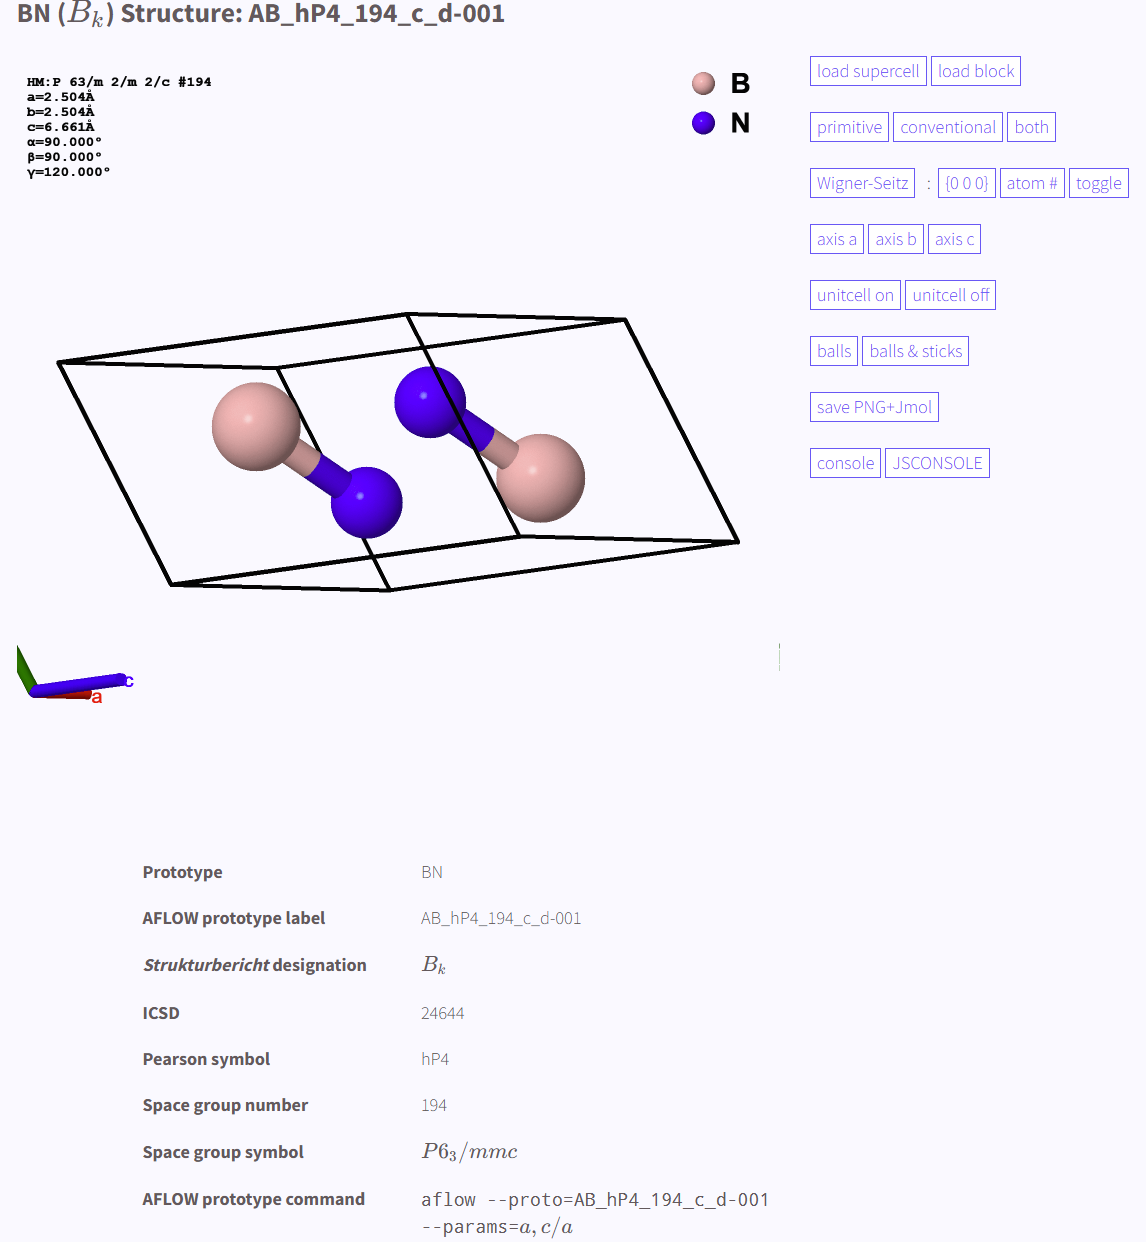

### i) XRD - X-ray Diffraction Analysis: 

Powder X-Ray Diffraction is one of the most common techniques for characterizing crystalline materials. Pymatgen includes an XRDCalculator class that makes it simple to calculate powder diffraction patterns for comparison with experiments[2].

The XRDCalculator supports [2]:

- Different x-ray wavelengths
- User-supplied Debye-Waller factors
- Does not include more advanced effects such as peak broadening or preferred orientation effects. 

In [2]:
structure_bn = Structure.from_file("BN.cif")
structure_bn

C:\Users\ellen\anaconda3\lib\site-packages\pymatgen\io\cif.py:1168: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


Structure Summary
Lattice
    abc : 2.504 2.504 6.66119088
 angles : 90.0 90.0 120.00000000000001
 volume : 36.170220770206726
      A : 2.504 0.0 1.5332577925324863e-16
      B : -1.2519999999999998 2.1685276110762346 1.5332577925324863e-16
      C : 0.0 0.0 6.66119088
    pbc : True True True
PeriodicSite: B1 (B) (1.944e-16, 1.446, 1.665) [0.3333, 0.6667, 0.25]
PeriodicSite: B1 (B) (1.252, 0.7228, 4.996) [0.6667, 0.3333, 0.75]
PeriodicSite: N2 (N) (1.944e-16, 1.446, 4.996) [0.3333, 0.6667, 0.75]
PeriodicSite: N2 (N) (1.252, 0.7228, 1.665) [0.6667, 0.3333, 0.25]

In [3]:
xrd_calculator = XRDCalculator(wavelength="CuKa")
xrd_pattern = xrd_calculator.get_pattern(structure_bn)

print("2θ (degrees)")
print(xrd_pattern.x)
print("Intensity")
print(xrd_pattern.y)
print("hkil (peak labels)")
print(xrd_pattern.hkls)

2θ (degrees)
[26.76680733 41.6486595  43.90871054 50.20215214 55.15296381 59.59298046
 71.42042315 76.01298987 82.2674712  85.5535731  87.95858675]
Intensity
[100.          16.10252013   5.26174828  15.62058767   7.19313353
   1.25309502   4.12851663   6.76173783  10.82845525   0.14947579
   1.54770575]
hkil (peak labels)
[[{'hkl': (0, 0, 0, 2), 'multiplicity': 2}], [{'hkl': (1, 0, -1, 0), 'multiplicity': 6}], [{'hkl': (1, 0, -1, 1), 'multiplicity': 12}], [{'hkl': (1, 0, -1, 2), 'multiplicity': 12}], [{'hkl': (0, 0, 0, 4), 'multiplicity': 2}], [{'hkl': (1, 0, -1, 3), 'multiplicity': 12}], [{'hkl': (1, 0, -1, 4), 'multiplicity': 12}], [{'hkl': (2, -1, -1, 0), 'multiplicity': 6}], [{'hkl': (2, -1, -1, 2), 'multiplicity': 12}], [{'hkl': (1, 0, -1, 5), 'multiplicity': 12}], [{'hkl': (0, 0, 0, 6), 'multiplicity': 2}]]


In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(xrd_pattern.x, xrd_pattern.y, width=0.1, color="blue", label="XRD Pattern")
plt.title("Powder XRD Pattern - Boron Nitride (BN)")
plt.xlabel("2θ (degrees)")
plt.ylabel("Intensity")

# Label significant peaks
# note: highest peak should be 100
intensity_cutoff = 5  
for i, (two_theta, intensity) in enumerate(zip(xrd_pattern.x, xrd_pattern.y)):
    if intensity > intensity_cutoff:  # Only label peaks with significant intensity
        hkl = xrd_pattern.hkls[i][0]['hkl']  # Extract the first hkl tuple for each peak
        plt.text(two_theta, intensity + 2, f"{hkl}", rotation=90, fontsize=8, ha="center", va="bottom")

plt.margins(y=0.2)  # prevent labels from exceeding plot boundary'''
plt.show()

### ii) NPD - Neutron Powder Diffraction Analysis: 

Neutron powder diffraction is a complementary technique to powder X-Ray Diffraction, offering higher sensitivity for ligher elements and better contrast between certain elements [2].

Pymatgen includes an NDCalculator that is similar to XRDCalculator for calculating neutron powder diffraction patterns. Note that while the current implementation takes into account isotope effects, it does not take into account magnetic configuration effects [2].

In [5]:
neutron_calculator = NDCalculator(wavelength=1.8)
neutron_pattern = neutron_calculator.get_pattern(structure_bn)

print("2θ (degrees)")
print(neutron_pattern.x)
print("Intensity")
print(neutron_pattern.y)
print("hkl (peak labels)")
print(neutron_pattern.hkls)

2θ (degrees)
[31.35494938 49.04217832 51.75734143 59.37190197 65.42772476 70.91844325
 85.90881157]
Intensity
[100.          33.64593415  14.15673076  49.4914352   28.607704
   8.8516861   31.0308293 ]
hkl (peak labels)
[[{'hkl': (0, 0, 0, 2), 'multiplicity': 2}], [{'hkl': (1, 0, -1, 0), 'multiplicity': 6}], [{'hkl': (1, 0, -1, 1), 'multiplicity': 12}], [{'hkl': (1, 0, -1, 2), 'multiplicity': 12}], [{'hkl': (0, 0, 0, 4), 'multiplicity': 2}], [{'hkl': (1, 0, -1, 3), 'multiplicity': 12}], [{'hkl': (1, 0, -1, 4), 'multiplicity': 12}]]


In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(neutron_pattern.x, neutron_pattern.y, width=0.1, color="red", label="Neutron Diffraction Pattern")
plt.title("Neutron Diffraction Pattern - Boron Nitride (BN)")
plt.xlabel("2θ (degrees)")
plt.ylabel("Intensity")

intensity_cutoff = 5
for i, (two_theta, intensity) in enumerate(zip(neutron_pattern.x, neutron_pattern.y)):
    if intensity > intensity_cutoff: 
        hkl = neutron_pattern.hkls[i][0]['hkl']
        plt.text(two_theta, intensity + 2, f"{hkl}", rotation=90, fontsize=9, ha="center", va="bottom")

plt.margins(y=0.2)
plt.show()

### iii) TEM - Transmission Electron Microscopy:

Pymatgen includes the TEMCalculator module that can generate TEM diffraction images, i.e., from the transmission electron microscopy selected area electron diffraction (TEM-SAED) method [2].

In [ ]:
tem_calculator = TEMCalculator()
fig = tem_calculator.get_plot_2d(structure_bn)


fig.update_layout(
    title="TEM Diffraction (SAED) Pattern - Boron Nitride (BN)",
    xaxis_title="Reciprocal Space X",
    yaxis_title="Reciprocal Space Y",
    xaxis=dict(scaleanchor="y"),
    showlegend=False)

fig.show()

In [33]:
# generate TEM diffraction pattern
tem_calculator = TEMCalculator(voltage=200, beam_direction=(0,0,1))
points = tem_calculator.generate_points(-10, 11)  # grid of points to check (3D cube)
tem_dots = tem_calculator.tem_dots(structure_bn, points)  # Get reciprocal lattice points

# extract spot data
xs = []
ys = []
hkls = []
intensities = []
for dot in tem_dots:
    xs.append(dot.position[0])
    ys.append(dot.position[1])
    hkls.append(str(dot.hkl))
    intensities.append(dot.intensity)

# format hkl labels
hkls = [hkl.replace(" ", "") for hkl in hkls]

# create base SAED plot
fig = tem_calculator.get_plot_2d(structure)

# add annotations on fig for spots with intensity above the threshold
intensity_threshold = 0.1
annotations = []
for x, y, hkl, intensity in zip(xs, ys, hkls, intensities):
    if intensity > intensity_threshold:
        annotations.append(
            dict(
                x=x,
                y=y-0.25,
                text=hkl,
                showarrow=False,
                font=dict(size=10, color="red"),
            )
        )

# update the plot parameters
fig.update_layout(
    title="TEM Diffraction (SAED) Pattern - Boron Nitride (BN)",
    xaxis_title="Reciprocal Space X",
    yaxis_title="Reciprocal Space Y",
    xaxis=dict(scaleanchor="y"),  # equal scaling for axes
    showlegend=False,
    annotations=annotations,
)

# how the interactive plot
fig.show()

References: 


[1] - https://aflowlib.org/p/AB_hP4_194_c_d-001/

[2] - https://github.com/computron/pymatgen_tutorials/blob/main/Part_5-Five_Features/pymatgen_pt5_five_features.ipynb